In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### CIFAR10

In [2]:
numval = 5
numseed = 4

# mask 0_0, noise_0.1_1
psnr_ndpca = [[21.05, 20.3, 19.39, 17.74, 16.35],
            [21.15, 20.48, 19.4, 17.74, 16.35],
            [21.06, 20.38, 19.4, 17.75, 16.35],
            [21.19, 20.49, 19.41, 17.75, 16.35]]

psnr_nuc_ndpca = [[20.78, 20.03, 18.89, 17.33, 15.82],
            [20.78, 20.03, 18.89, 17.33, 15.82],
            [20.78, 20.03, 18.89, 17.33, 15.82],
            [20.78, 20.03, 18.89, 17.33, 15.82]]

psnr_cos_ndpca = [[20.93, 20.04, 18.86, 17.23, 15.85],
            [20.93, 20.04, 18.86, 17.23, 15.85],
            [20.93, 20.04, 18.86, 17.23, 15.85],
            [20.93, 20.04, 18.86, 17.23, 15.85]]

Z = [64, 48, 32, 16, 8]

Z1 = [[52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1],
      [52, 39, 26, 13, 1]]

# convert to numpy array and transpose
psnr_ndpca = np.array(psnr_ndpca).T
psnr_nuc_ndpca = np.array(psnr_nuc_ndpca).T
psnr_cos_ndpca = np.array(psnr_cos_ndpca).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
	for j in range(numseed):
		# Z1[i, j] = int(Z[i] / 2)
		Z2[i, j] = Z[i] - Z1[i, j]
		# print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T

In [3]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_ndpca)): ### latent dim
    for j in range(len(psnr_ndpca[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_nuc_ndpca[i, j], 'method': 'Nuclear norm', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_cos_ndpca[i, j], 'method': 'Cosine similarity', 'seed': j}, ignore_index=True)

print(cifar_df.head())

   dpca_dim  Z1    Z2   psnr             method  seed
0        64   8  12.0  21.05       NDPCA (ours)     0
1        64   8  12.0  20.78       Nuclear norm     0
2        64   8  12.0  20.93  Cosine similarity     0
3        64   8  12.0  21.15       NDPCA (ours)     1
4        64   8  12.0  20.78       Nuclear norm     1


### Plots

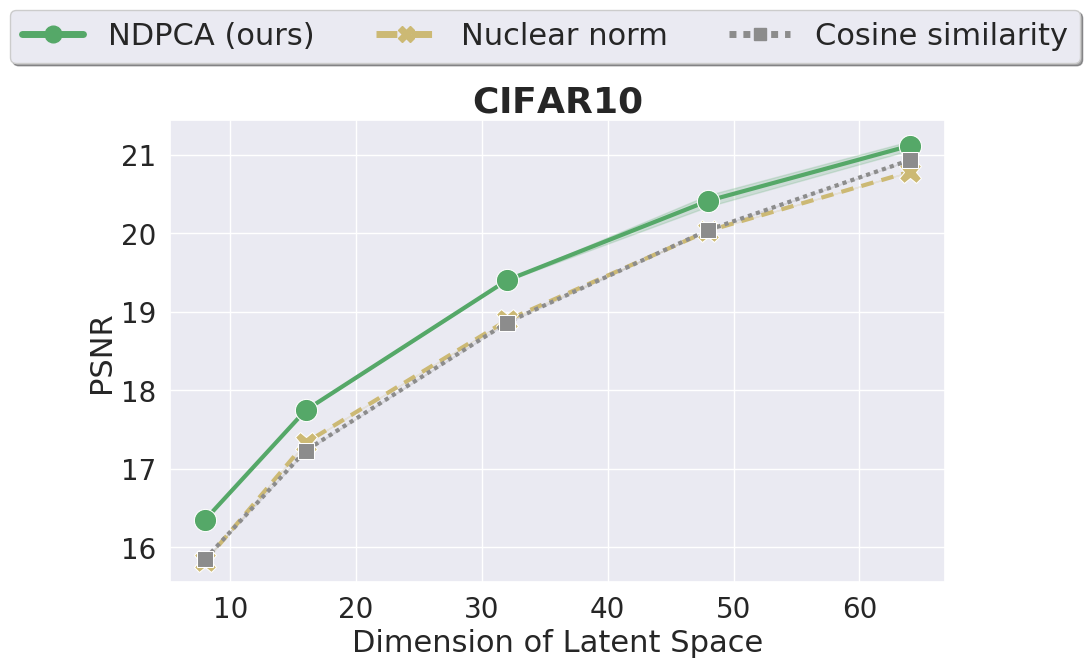

In [4]:
# fig, ax_list = plt.subplot_mosaic(
        # [["cifar_dpca", "pnp_dpca", "airbus_dpca"]], figsize=(23, 6))

fig, ax_list = plt.subplot_mosaic([["cifar_dpca"]], figsize=(10, 6))

xylabelsize = 22
titlesize = 26
legendsize = 22
ticksize = 20

### set title
ax_list["cifar_dpca"].set_title(r"$\bf{CIFAR10}$", fontsize=titlesize)

### plot cifar denoising
## plot DPCA curve
ax1 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[8], color_list[7]], dashes=['', (3,2), (1,1)], markers=True, markersize=16)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=xylabelsize)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["cifar_dpca"].legend()
ax_list["cifar_dpca"].legend().remove()

### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["cifar_dpca"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, shadow=True, ncol=7, fontsize=22, markerscale=2)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
fig.savefig('./norm_results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')